In [1]:
import SERfuncs

In [2]:
from __future__ import division
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import graphlab

In [3]:
HealthyData = graphlab.SFrame.read_csv('../Datasets/Cbrace/HealthyData.csv')
CBRData = graphlab.SFrame.read_csv('../Datasets/Cbrace/PatientCBRData.csv')
SCOData = graphlab.SFrame.read_csv('../Datasets/Cbrace/PatientSCOData.csv')

This non-commercial license of GraphLab Create is assigned to llonini@ricres.org and will expire on November 11, 2016. For commercial licensing options, visit https://turi.com/buy/.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.0.1 started. Logging: /tmp/graphlab_server_1468597357.log


Finished parsing file /Users/luca/Projects/Datasets/Cbrace/HealthyData.csv

Parsing completed. Parsed 100 lines in 0.276159 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/HealthyData.csv

Parsing completed. Parsed 8375 lines in 0.506328 secs.

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientCBRData.csv

Parsing completed. Parsed 100 lines in 0.826001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientCBRData.csv

Parsing completed. Parsed 22354 lines in 1.07475 secs.

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientSCOData.csv

Parsing completed. Parsed 100 lines in 0.914309 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientSCOData.csv

Parsing completed. Parsed 18762 lines in 0.947199 secs.

In [4]:
CBRData.head(5)

Columns:
	SubjID	int
	Session	int
	Features_  1	float
	Features_  2	float
	Features_  3	float
	Features_  4	int
	Features_  5	int
	Features_  6	int
	Features_  7	int
	Features_  8	float
	Features_  9	float
	Features_ 10	float
	Features_ 11	float
	Features_ 12	float
	Features_ 13	float
	Features_ 14	float
	Features_ 15	float
	Features_ 16	float
	Features_ 17	float
	Features_ 18	int
	Features_ 19	int
	Features_ 20	int
	Features_ 21	int
	Features_ 22	float
	Features_ 23	float
	Features_ 24	float
	Features_ 25	float
	Features_ 26	float
	Features_ 27	float
	Features_ 28	float
	Features_ 29	float
	Features_ 30	float
	Features_ 31	float
	Features_ 32	int
	Features_ 33	int
	Features_ 34	int
	Features_ 35	int
	Features_ 36	float
	Features_ 37	float
	Features_ 38	float
	Features_ 39	float
	Features_ 40	float
	Features_ 41	float
	Features_ 42	float
	Features_ 43	float
	Features_ 44	float
	Features_ 45	float
	Features_ 46	float
	Features_ 47	float
	Features_ 48	float
	Features_ 49	float
	Features_ 50	float
	Features_ 51	float
	Features_ 52	float
	Features_ 53	float
	Features_ 54	float
	Features_ 55	float
	Features_ 56	float
	Features_ 57	float
	Features_ 58	float
	Features_ 59	float
	Features_ 60	float
	Features_ 61	float
	Features_ 62	float
	Features_ 63	float
	Features_ 64	float
	Features_ 65	float
	Features_ 66	float
	Features_ 67	float
	Features_ 68	float
	Features_ 69	float
	Features_ 70	float
	Features_ 71	float
	Features_ 72	float
	Features_ 73	float
	Features_ 74	float
	Features_ 75	float
	Features_ 76	float
	Features_ 77	float
	Features_ 78	float
	Features_ 79	float
	Features_ 80	float
	Features_ 81	float
	Features_ 82	float
	Features_ 83	float
	Features_ 84	float
	Features_ 85	float
	Features_ 86	float
	Features_ 87	float
	Features_ 88	float
	Features_ 89	float
	Features_ 90	float
	Features_ 91	float
	Features_ 92	float
	Features_ 93	float
	Features_ 94	float
	Features_ 95	float
	Features_ 96	float
	Features_ 97	float
	Features_ 98	float
	Features_ 99	float
	Features_100	float
	Features_101	float
	Features_102	float
	Features_103	float
	Features_104	float
	Features_105	float
	Features_106	float
	Features_107	float
	Features_108	float
	Features_109	float
	Features_110	float
	Features_111	float
	Features_112	float
	Features_113	float
	Features_114	float
	Features_115	float
	Features_116	float
	Features_117	float
	Features_118	float
	Features_119	float
	Features_120	float
	Features_121	float
	Features_122	float
	Features_123	float
	Features_124	float
	Features_125	float
	Features_126	float
	Features_127	float
	Features_128	float
	Features_129	float
	Features_130	float
	Features_131	float
	Label	int

Rows: 5

Data:
+--------+---------+-----------------+--------------+--------------+--------------+
| SubjID | Session |   Features_  1  | Features_  2 | Features_  3 | Features_  4 |
+--------+---------+-----------------+--------------+--------------+--------------+
|   1    |    1    |  0.051382320442 |    0.6076    |    0.196     |      0       |
|   1    |    1    | 0.0253933701657 |    0.6076    |    0.1176    |      0       |
|   1    |    1    | 0.0248519337017 |     0.49     |    0.1176    |      0       |
|   1    |    1    | 0.0465635359116 |    0.3136    |    0.0784    |      0       |
|   1    |    1    | 0.0781834254144 |    0.2352    |    0.0784    |      56      |
+--------+---------+-----------------+--------------+--------------+--------------+
+--------------+--------------+--------------+-----------------+-----------------+
| Features_  5 | Features_  6 | Features_  7 |   Features_  8  |   Features_  9  |
+--------------+--------------+--------------+-----------------+-----------------+
|     181      |      0       |      0       |  0.112454267826 | -0.294668590342 |
|     178      |      3       |      0       | 0.0983200079119 | 0.0523105353163 |
|     181      |      0       |      0       | 0.0841222692085 | -0.592549758023 |
|     181      |      0       |      0       | 0.0654386480834 |  -1.01056633159 |
|     

In [48]:
#SUBJECTS IN THE DATABASE
HealthyCodes = HealthyData['SubjID'].unique()
HealthyCodes = HealthyCodes.sort()
print HealthyCodes
PatientCodes = CBRData['SubjID'].unique()
PatientCodes = PatientCodes.sort()
print PatientCodes

[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
[1, 2, 5, 6, 8, 11, 12, 13, 14, 15, 16, 19]


In [47]:
#LOSO cross validation on healthy
# NEED TO UPDATE TO BALANCED ACCURACY

col_names = HealthyData.column_names()
label_cols = col_names[-1:] #the : is used to return a list with one element 
feature_cols = col_names[2:-1]

CVacc = np.zeros(len(HealthyCodes)) 
k = 0
for s in HealthyCodes:
    print 'Test Subject = %s'%s
    #1 subject is test, the rest is used for training
    test = HealthyData[HealthyData['SubjID'] == s]
    train = HealthyData[HealthyData['SubjID'] != s]
    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1) #to squeeze last dimension and obtain a 1D array
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    print 'Train samples = %s, Test samples = %s'%(len(ytrain),len(ytest))
    #train a RF 
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    
    #unbalanced accuracy  - 
    #acc = sum(ypred == ytest)/len(ytest)

    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    CVacc[k] = BAcc

    print 'BACC = %s'%CVacc[k]
    k = k+1
    
print 'mean CVacc = %s'%CVacc.mean()

Test Subject = 60
Train samples = 7695, Test samples = 680
BACC = 0.792530157397
Test Subject = 53
Train samples = 7608, Test samples = 767
BACC = 0.834903116692
Test Subject = 54
Train samples = 7692, Test samples = 683
BACC = 0.627652213498
Test Subject = 61
Train samples = 7710, Test samples = 665
BACC = 0.494446849117
Test Subject = 51
Train samples = 7371, Test samples = 1004
BACC = 0.796481320028
Test Subject = 56
Train samples = 7591, Test samples = 784
BACC = 0.931064013318
Test Subject = 58
Train samples = 7617, Test samples = 758
BACC = 0.491074174668
Test Subject = 55
Train samples = 7668, Test samples = 707
BACC = 0.90417109649
Test Subject = 59
Train samples = 7649, Test samples = 726
BACC = 0.736532026628
Test Subject = 52
Train samples = 7666, Test samples = 709
BACC = 0.671581316505
Test Subject = 57
Train samples = 7483, Test samples = 892
BACC = 0.787296046887
mean CVacc = 0.73343021193


In [43]:
#display the Confusion Matrix for one subject
#labels=["sitting", "stairs dw", "stairs up", "standing", "walking"])
cmat = confusion_matrix(ytest, ypred)
#print cmat
totals = cmat.sum(axis=1)
cmat = cmat/totals
print cmat

[[ 0.9887218   0.          0.01219512  0.00673401  0.        ]
 [ 0.          1.          0.          0.          0.        ]
 [ 0.          0.54545455  0.23170732  0.          0.14917127]
 [ 0.17669173  0.          0.02439024  0.80808081  0.0441989 ]
 [ 0.          0.13636364  0.          0.01346801  0.9281768 ]]


## Train on Healthy and test on CBR patients


In [49]:
#NEED TO UPDATE TO BACC
Xtrain = HealthyData.select_columns(feature_cols).to_numpy()
ytrain = HealthyData.select_columns(label_cols).to_numpy()
ytrain = ytrain.reshape(-1) #to squeeze last dimension and obtain a 1D array

RF = RandomForestClassifier(n_estimators=50)
RF = RF.fit(Xtrain,ytrain)

#test on each patient (CBR)
PatientCodes = CBRData['SubjID'].unique()
PatientCodes = PatientCodes.sort()
CVacc = np.zeros(len(PatientCodes))
k = 0

for s in PatientCodes:
    test = CBRData[CBRData['SubjID'] == s]
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1) #to squeeze last dimension and obtain a 1D array

    print 'Test on Patient %s'%s
    print 'Train samples = %s, Test samples = %s'%(len(ytrain),len(ytest))
    ypred = RF.predict(Xtest)

    #    acc = sum(ypred == ytest)
    #    CVacc[k] = acc/len(ytest)

    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    CVacc[k] = BAcc

    print 'BAcc = %s'%CVacc[k]
    k = k+1

print '\nmean acc Source only = %s'%CVacc.mean()


Test on Patient 1
Train samples = 8375, Test samples = 1678
BAcc = 0.446169731087
Test on Patient 2
Train samples = 8375, Test samples = 1458
BAcc = 0.341511474189
Test on Patient 5
Train samples = 8375, Test samples = 1773
BAcc = 0.450276600937
Test on Patient 6
Train samples = 8375, Test samples = 2916
BAcc = 0.577490157982
Test on Patient 8
Train samples = 8375, Test samples = 1210
BAcc = 0.308434449062
Test on Patient 11
Train samples = 8375, Test samples = 1708
BAcc = 0.496687982647
Test on Patient 12
Train samples = 8375, Test samples = 1187
BAcc = 0.319428674861
Test on Patient 13
Train samples = 8375, Test samples = 1638
BAcc = 0.495198920721
Test on Patient 14
Train samples = 8375, Test samples = 1976
BAcc = 0.493754532739
Test on Patient 15
Train samples = 8375, Test samples = 3511
BAcc = 0.481034761718
Test on Patient 16
Train samples = 8375, Test samples = 1734
BAcc = 0.580564955721
Test on Patient 19
Train samples = 8375, Test samples = 1565
BAcc = 0.534835238454

mean acc

## Now test the SER - Use one session of data from each patient as target and the remaining as his test
* Need to compute CV error on each session

In [73]:
SOacc = np.zeros(len(PatientCodes)) #to store err when using source only
SERacc = np.zeros(len(PatientCodes)) #to store err when using source + Target with SER
k = 0
for s in PatientCodes:
    
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)

    print 'Test on Patient %s,  '%s
    print '# of classes = %s'%Nclasses
    print 'Source samples = %s, Target samples = %s, Test samples = %s'%(len(ytrain),len(ytarget),len(ytest))

    #predicting using only source data
    ypred = RF.predict(Xtest)
    #correct = sum(ypred == ytest)
    #SOacc[k] = correct/len(ytest)
    
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    SOacc[k] = acc_c/len(np.unique(ytest))
   
    print 'Accuracy Source Only = %s'%SOacc[k]

    #combining source w target data
    newRF = SERfuncs.forest_convert(RF)
    expRF = SERfuncs.forest_SER(newRF,Xtarget,ytarget,C=5) #refine RF on current data (C is the # of classes on the source)
    #SERacc[k] = 1-SERfuncs.evaluate_classification_error(expRF, Xtest, ytest)

    #balanced accuracy
    acc_c = 0
    ypred = np.asarray(map(lambda x:SERfuncs.forest_classify_ensemble(expRF,x),Xtest))
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    SERacc[k] = acc_c/Nclasses
    print 'Accuracy w SER = %s\n'%SERacc[k]
    k = k+1
    
print 'mean Acc - Source only = %s'%SOacc.mean()
print 'mean Acc - SER = %s'%SERacc.mean()

Test on Patient 1,  
# of classes = 5
Source samples = 8375, Target samples = 501, Test samples = 1177
Accuracy Source Only = 0.423645044573
Accuracy w SER = 0.633271735602

Test on Patient 2,  
# of classes = 5
Source samples = 8375, Target samples = 230, Test samples = 1228
Accuracy Source Only = 0.343585499161
Accuracy w SER = 0.416381694208

Test on Patient 5,  
# of classes = 5
Source samples = 8375, Target samples = 305, Test samples = 1468
Accuracy Source Only = 0.461411170903
Accuracy w SER = 0.538311847686

Test on Patient 6,  
# of classes = 4
Source samples = 8375, Target samples = 670, Test samples = 2246
Accuracy Source Only = 0.591883850957
Accuracy w SER = 0.867291683864

Test on Patient 8,  
# of classes = 3
Source samples = 8375, Target samples = 284, Test samples = 926
Accuracy Source Only = 0.301682361898
Accuracy w SER = 0.684698777767

Test on Patient 11,  
# of classes = 3
Source samples = 8375, Target samples = 501, Test samples = 1207
Accuracy Source Only = 0.47

## Train a forest on Target data only

In [104]:
TOacc = np.zeros(len(PatientCodes)) 
Ntarget = np.zeros(len(PatientCodes))
k = 0
for s in PatientCodes:
    
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    Ntarget[k] = len(ytarget)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtarget,ytarget)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    TOacc[k] = BAcc
    print 'Patient %s, BAcc = %s'%(s,TOacc[k])
    k = k+1

print '\nmean acc Target only = %s'%TOacc.mean()

Patient 1, BAcc = 0.782353916834
Patient 2, BAcc = 0.519582790593
Patient 5, BAcc = 0.678810213031
Patient 6, BAcc = 0.547444712576
Patient 8, BAcc = 0.531147217608
Patient 11, BAcc = 0.488503053992
Patient 12, BAcc = 0.578857406961
Patient 13, BAcc = 0.499366527951
Patient 14, BAcc = 0.581935458104
Patient 15, BAcc = 0.572842098834
Patient 16, BAcc = 0.614623294115
Patient 19, BAcc = 0.687233742275

mean acc Target only = 0.590225036073


<function matplotlib.pyplot.show>

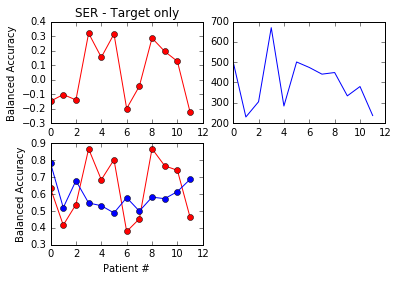

In [105]:
plt.figure(1)
plt.subplot(221)
plt.plot(SERacc-TOacc,'ro-')
plt.xlabel('Patient #')
plt.ylabel('Balanced Accuracy')
plt.title('SER - Target only')

plt.subplot(223)
plt.plot(SERacc,'ro-',TOacc,'bo-')
plt.xlabel('Patient #')
plt.ylabel('Balanced Accuracy')
#plt.legend(['w SER','Target only'])

plt.subplot(222)
plt.plot(Ntarget)
plt.show

In [92]:
np.corrcoef(SERacc,Ntarget)

array([[ 1.        ,  0.47824651],
       [ 0.47824651,  1.        ]])

## Train on Source (Healthy) + Target

In [106]:
XHealthy = HealthyData.select_columns(feature_cols).to_numpy()
yHealthy = HealthyData.select_columns(label_cols).to_numpy()
yHealthy = yHealthy.reshape(-1) #to squeeze last dimension and obtain a 1D array
SaTacc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)

    Xtrain = np.concatenate((XHealthy,Xtarget),axis=0)
    ytrain = np.concatenate((yHealthy,ytarget),axis=0)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    SaTacc[k] = BAcc
    print 'Patient %s, BAcc = %s'%(s,SaTacc[k])
    k = k+1

print 'Mean BAcc using Source + Target = %s'%SaTacc.mean()

Patient 1, BAcc = 0.693366339231
Patient 2, BAcc = 0.48496129395
Patient 5, BAcc = 0.542598414386
Patient 6, BAcc = 0.60554826079
Patient 8, BAcc = 0.491942096606
Patient 11, BAcc = 0.514690930195
Patient 12, BAcc = 0.445942448356
Patient 13, BAcc = 0.492195138598
Patient 14, BAcc = 0.544425557455
Patient 15, BAcc = 0.541548160755
Patient 16, BAcc = 0.6821604366
Patient 19, BAcc = 0.46680819001
Mean BAcc using  = 0.542182272244


In [116]:
SOacc = np.expand_dims(SOacc, axis=1)
TOacc = np.expand_dims(TOacc, axis=1)
SaTacc = np.expand_dims(SaTacc, axis=1)
SERacc = np.expand_dims(SERacc, axis=1)

AccAll = np.concatenate((SOacc,TOacc,SaTacc,SERacc),axis=1)
print AccAll

[[ 0.42364504  0.78235392  0.69336634  0.63327174]
 [ 0.3435855   0.51958279  0.48496129  0.41638169]
 [ 0.46141117  0.67881021  0.54259841  0.53831185]
 [ 0.59188385  0.54744471  0.60554826  0.86729168]
 [ 0.30168236  0.53114722  0.4919421   0.68469878]
 [ 0.47937527  0.48850305  0.51469093  0.80323902]
 [ 0.37185435  0.57885741  0.44594245  0.37876055]
 [ 0.45717952  0.49936653  0.49219514  0.45355013]
 [ 0.50101132  0.58193546  0.54442556  0.8683807 ]
 [ 0.47338572  0.5728421   0.54154816  0.76705154]
 [ 0.66761197  0.61462329  0.68216044  0.74054538]
 [ 0.50693174  0.68723374  0.46680819  0.46254383]]


<function matplotlib.pyplot.show>

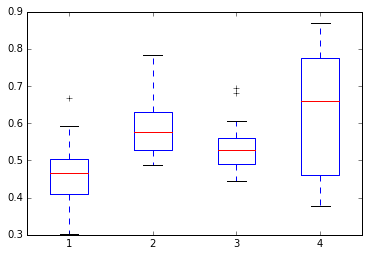

In [118]:
plt.boxplot(AccAll)
plt.show

# Classifier Specificity paper tests
* Note: Patients currently used are 1 2 5 6 8 11 14 15 16 19
* Need to consolidate which session is used for test, which for target

In [139]:
PatientCodes = np.array([1, 2, 5, 6, 8, 11, 14, 15, 16, 19])

## Impairment specific model (Leave one subject out)

In [141]:
ISpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] != s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)] #test on the 1st session
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    PSpec_acc[k] = BAcc
    print 'Patient %s, Impairment specific (SCO) model - BAcc = %s'%(s,PSpec_acc[k])
    k = k+1

print 'Mean BAcc - Impairment Specific (SCO) = %s'%PSpec_acc.mean()    

Patient 1, Impairment specific (SCO) model - BAcc = 0.502705197331
Patient 2, Impairment specific (SCO) model - BAcc = 0.388950930642
Patient 5, Impairment specific (SCO) model - BAcc = 0.454212953313
Patient 6, Impairment specific (SCO) model - BAcc = 0.57007583599
Patient 8, Impairment specific (SCO) model - BAcc = 0.23066766823
Patient 11, Impairment specific (SCO) model - BAcc = 0.540397224885
Patient 14, Impairment specific (SCO) model - BAcc = 0.581165478644
Patient 15, Impairment specific (SCO) model - BAcc = 0.516202750097
Patient 16, Impairment specific (SCO) model - BAcc = 0.605172937808
Patient 19, Impairment specific (SCO) model - BAcc = 0.842282913212
Mean BAcc - Impairment Specific (SCO) = 0.523183389015


## Train on SCO and test on CBR (Patient Specific model) 

In [140]:
PSpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] == s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    PSpec_acc[k] = BAcc
    print 'Patient %s, Personal model, Train SCO - BAcc = %s'%(s,PSpec_acc[k])
    k = k+1

print 'Mean BAcc - Patient Specific (SCO) = %s'%PSpec_acc.mean()    

Patient 1, Personal model, Train SCO - BAcc = 0.719440151145
Patient 2, Personal model, Train SCO - BAcc = 0.450606667993
Patient 5, Personal model, Train SCO - BAcc = 0.631459883818
Patient 6, Personal model, Train SCO - BAcc = 0.691727825691
Patient 8, Personal model, Train SCO - BAcc = 0.462869947398
Patient 11, Personal model, Train SCO - BAcc = 0.41867478875
Patient 14, Personal model, Train SCO - BAcc = 0.509428936733
Patient 15, Personal model, Train SCO - BAcc = 0.439811417146
Patient 16, Personal model, Train SCO - BAcc = 0.519741150957
Patient 19, Personal model, Train SCO - BAcc = 0.754211556324
Mean BAcc - Patient Specific (SCO) = 0.559797232595


## Train and test on CBR - Device specific model (CBR)

In [ ]:
PSpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    PSpec_acc[k] = BAcc
    print 'Patient %s, Personal model, Train SCO - BAcc = %s'%(s,PSpec_acc[k])
    k = k+1

print 'Mean BAcc - Patient Specific (SCO) = %s'%PSpec_acc.mean()    